In [4]:
#1.

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame with features and target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Print the first few rows of the dataset to check its contents
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
#2.

# The dataset "breast_cancer" fits the criteria to perform classification and regression algorithms as the dataset contains
# high quility data that has been cleaned already. Furthermore, there are no missing values and the target variables are 
# binary 1's or 0's. The data shown aboveshows that the data is clearly constructed with distinguised columns and rows. The 
# first 5 samples of data where the columns represent the breast attributes and the last column representing if the sample is. 
# malignant or benign(target variable). The dataset contains a total of 569 total samples with 212 samples for malignant and 
# 357 samples for benign so there should be a sufficient amount of data to produce relatively accurate regression and 
# classification.

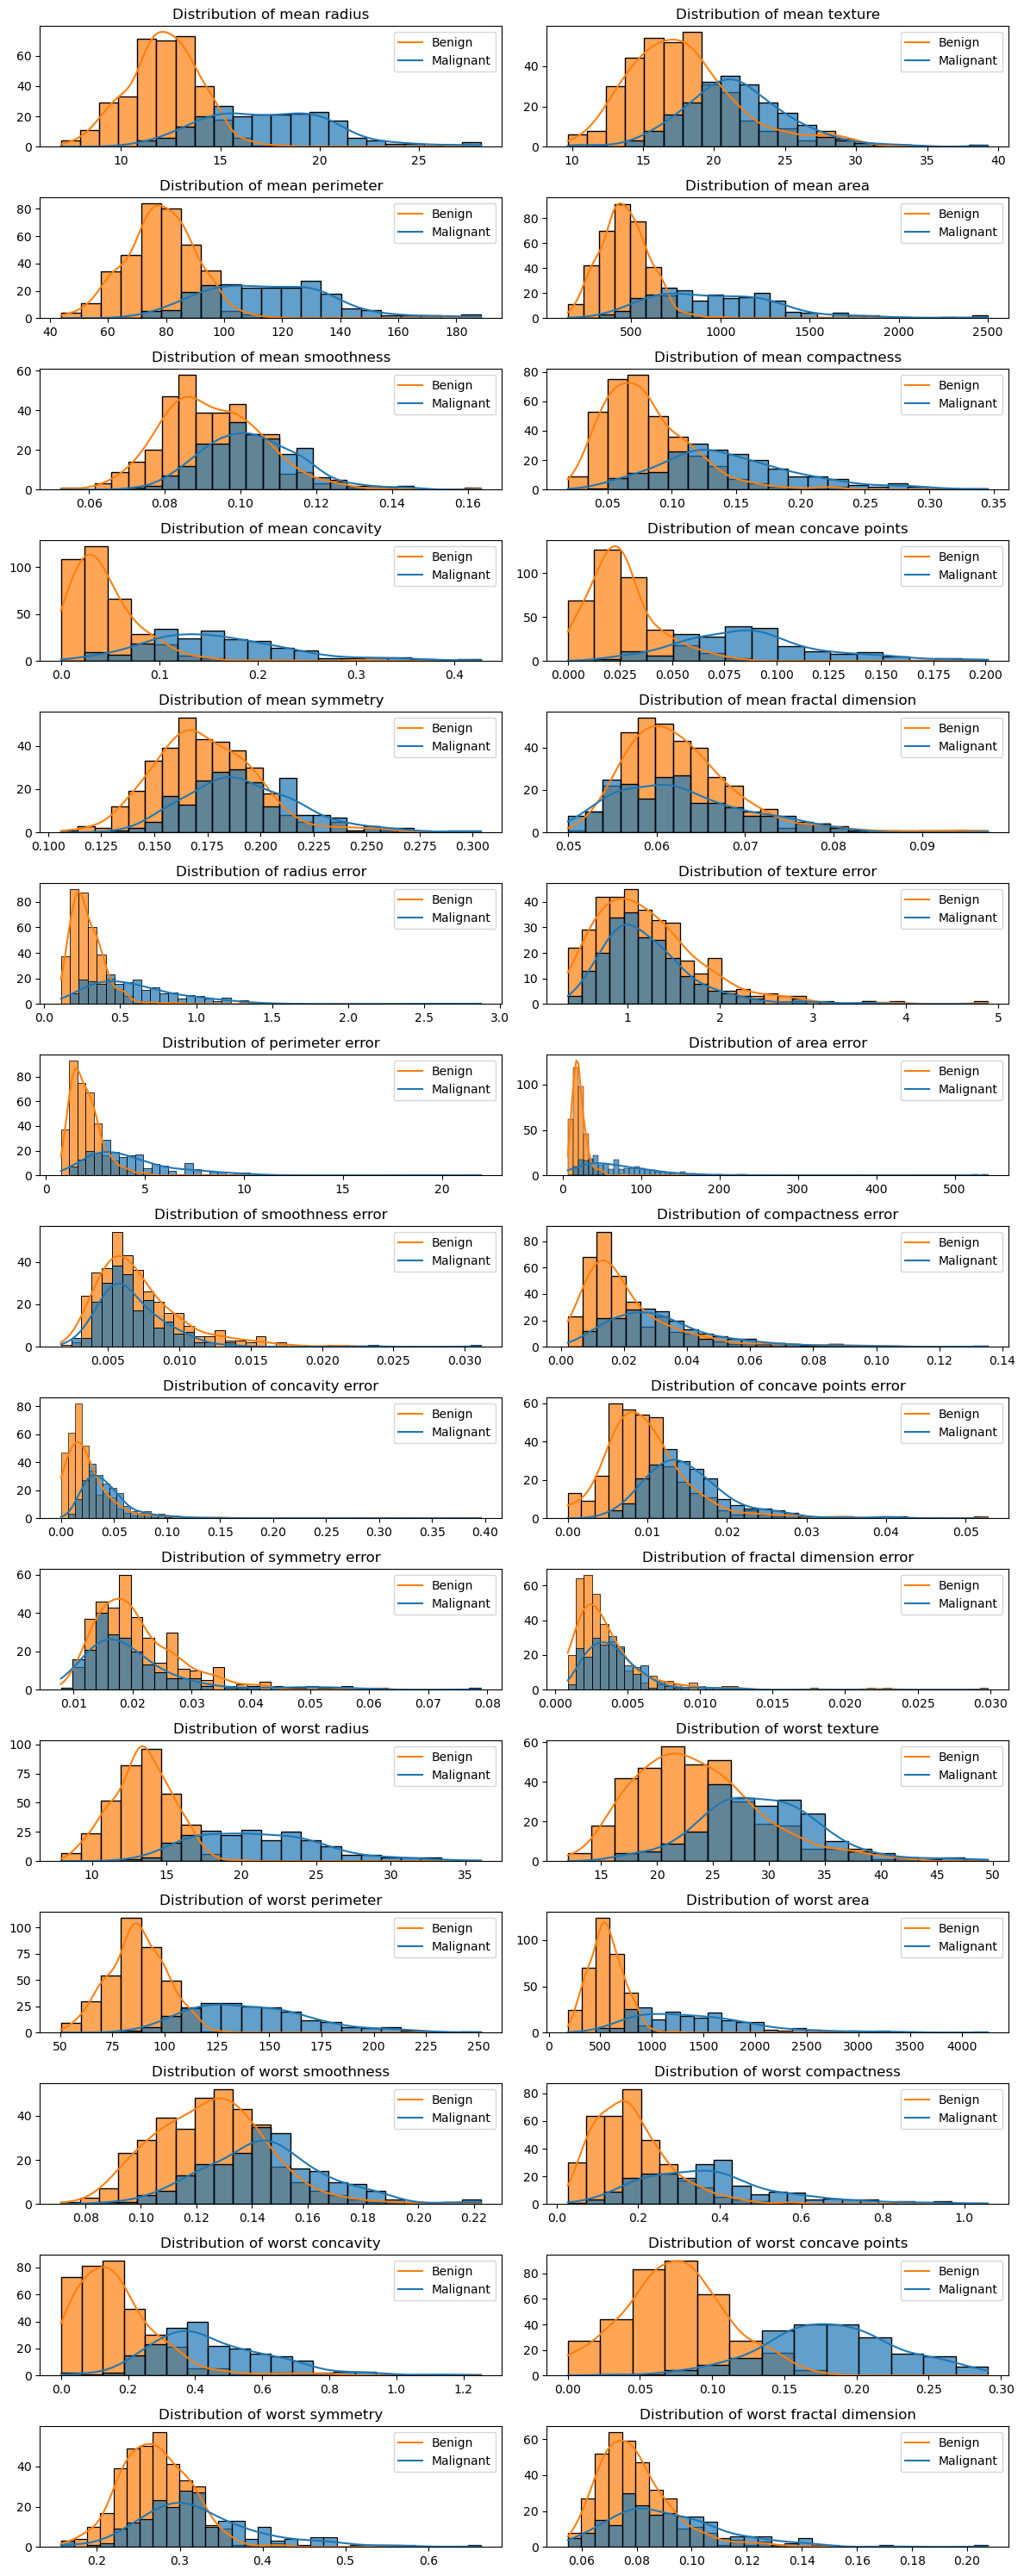

In [6]:
#3

import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Class labels are correct (0 is benign, 1 is malignant)

# Histograms to visualize feature distributions for both classes
fig, axes = plt.subplots(15, 2, figsize=(12, 30))
axes = axes.ravel()

# Visualize the distribution of each feature for both classes
for i, feature in enumerate(data.feature_names):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], hue='target', alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(['Benign', 'Malignant'])

plt.tight_layout()
plt.show()



C:\Users\black\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\black\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


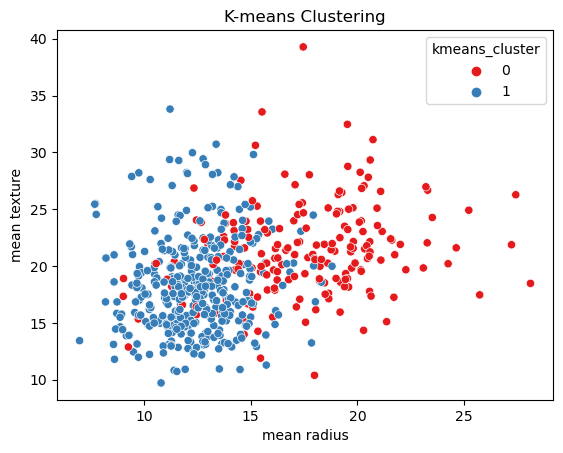

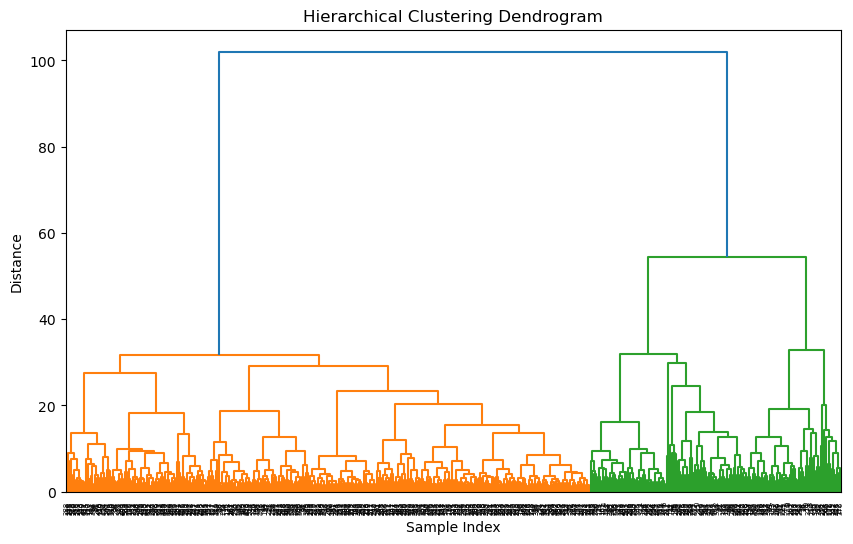

In [7]:
#4

# K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features for K-means clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['kmeans_cluster'] = kmeans_labels

# Visualize the clusters based on two features (you can choose any two features)
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='kmeans_cluster', palette='Set1')
plt.title('K-means Clustering')
plt.show()

# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply hierarchical clustering
hierarchical_clusters = linkage(X_scaled, method='ward')

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(10, 6))
dendrogram(hierarchical_clusters)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [15]:
#5
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model (estimator)
estimator = LogisticRegression(random_state=42)

# Create the RFE object and fit it to the training data
rfe = RFE(estimator=estimator, n_features_to_select=5)  # Select 5 features
rfe.fit(X_train_scaled, y_train)

# Apply PCA to reduce dimensionality and handle multicollinearity
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get the mask of selected features in the original feature space
selected_mask_original = rfe.support_

# Selected features
selected_feature_names = data.feature_names[selected_mask_original]

print("Selected features:")
print(selected_feature_names)



Selected features:
['radius error' 'worst radius' 'worst texture' 'worst area'
 'worst concave points']


In [1]:
#6
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model (estimator) for RFE
estimator_rfe = LogisticRegression(random_state=42)

# Create the RFE object and fit it to the training data
rfe = RFE(estimator=estimator_rfe, n_features_to_select=5)  # Select 5 features
rfe.fit(X_train_scaled, y_train)

# Get the mask of selected features in the original feature space
selected_mask_original = rfe.support_

# Selected features
selected_feature_names = data.feature_names[selected_mask_original]

print("Selected features:")
print(selected_feature_names)

# Separate the selected features from the original data
X_train_selected = X_train_scaled[:, selected_mask_original]
X_test_selected = X_test_scaled[:, selected_mask_original]

# Apply PCA on the selected features to further reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

print("Reduced dimensions with PCA:")
print(X_train_pca.shape)  # (n_samples, n_components)
print(X_test_pca.shape)  # (n_samples, n_components)


Selected features:
['radius error' 'worst radius' 'worst texture' 'worst area'
 'worst concave points']
Reduced dimensions with PCA:
(455, 2)
(114, 2)


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality and handle multicollinearity
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a logistic regression model (estimator) for RFE
estimator_rfe = LinearRegression()

# Create the RFE object and fit it to the training data
rfe = RFE(estimator=estimator_rfe, n_features_to_select=5)  # Select 5 features
rfe.fit(X_train, y_train)

# Get the mask of selected features in the original feature space
selected_mask_original = rfe.support_

# Selected features
selected_feature_names = data.feature_names[selected_mask_original]

print("Selected features:")
print(selected_feature_names)

# Separate the selected features from the original data
X_train_selected = X_train[:, selected_mask_original]
X_test_selected = X_test[:, selected_mask_original]

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)
y_pred_lin = lin_reg.predict(X_test_selected)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Support Vector Regression (SVR)
svr = SVR(kernel='linear')
svr.fit(X_train_selected, y_train)
y_pred_svr = svr.predict(X_test_selected)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_selected, y_train)
y_pred_tree = tree_reg.predict(X_test_selected)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_selected, y_train)
y_pred_rf = rf_reg.predict(X_test_selected)

# Evaluation Metrics
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

print("Evaluation Metrics for Original Data:")
print("Linear Regression:")
print(evaluate_regression(y_test, y_pred_lin))
print("Polynomial Regression:")
print(evaluate_regression(y_test, y_pred_poly))
print("Support Vector Regression:")
print(evaluate_regression(y_test, y_pred_svr))
print("Decision Tree Regression:")
print(evaluate_regression(y_test, y_pred_tree))
print("Random Forest Regression:")
print(evaluate_regression(y_test, y_pred_rf))


Selected features:
['mean concave points' 'mean fractal dimension' 'smoothness error'
 'fractal dimension error' 'worst fractal dimension']
Evaluation Metrics for Original Data:
Linear Regression:
(0.07339271870913382, 0.2709109054821046, 0.6875821250101857)
Polynomial Regression:
(0.0772006094631454, 0.2778499765397604, 0.6713727086200335)
Support Vector Regression:
(0.11068569076655668, 0.3326945908285205, 0.5288335285941138)
Decision Tree Regression:
(0.11403508771929824, 0.33769081675298523, 0.5145758270553554)
Random Forest Regression:
(0.06991666666666667, 0.2644175990108576, 0.7023789715034392)
